<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/CV/W2_Pi6_Monkey_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Introduction to Computer Vision - Convolutional Neural Networks</center></h1>

<center><p float="center">
  <img src="https://images.pexels.com/photos/612346/pexels-photo-612346.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="720"/>
</p></center>

<center><font size=6>Monkey Species Classification</font></center>

# Problem Statement

## Business Context

In recent years, habitat destruction, climate change, and poaching have driven several monkey species to extinction, with many more classified as endangered. Conservation efforts worldwide increasingly rely on data-driven approaches to monitor and protect these species. A U.S.-based wildlife sanctuary has taken a proactive step by collecting extensive image datasets of endangered monkey species from different continents to aid in conservation and research efforts.  

However, manually sorting and categorizing these images based on species has become a significant challenge due to the sheer volume of data and the visual similarities among different species. This lack of an efficient classification system hampers the sanctuary’s ability to analyze trends, track populations, and make informed conservation decisions. An automated and accurate image classification solution is needed to streamline this process and enhance conservation efforts.  

To address this challenge, a image classification model can be developed to categorize monkey species efficiently. Additionally, integrating this system into a user-friendly application can enable conservationists to quickly classify and analyze images, ultimately aiding in better wildlife management and protection strategies.

## Objective

Develop an image classification model using CNN to accurately categorize endangered monkey species, enabling the wildlife sanctuary to nhance conservation efforts.

## Data Description

-  Due to the large volume of data, the images were converted to the images.npy file and the labels are also placed in Labels.csv, allowing you to work on the data without being concerned about the large data volume.
- The dataset comprises of 10 monkey species.

**List of Species**
- Mantled Howler
- Patas Monkey
- Bald Monkey
- Japanese Macaque
- Pygmy Marmoset
- White Headed Capuchin
- Silver Marmosetr
- Common Squirrel Monkey
- Black Headed Night Monkey
- Nilgiri Langur


####**Note: Please use GPU runtime to execute the code efficiently**


# Installing and Importing the necessary libraries

In [ ]:
!pip install numpy==1.25.2 pandas==2.0.3 seaborn==0.13.1 tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib==3.7.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently ta

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import os
import numpy as np  # Importing numpy for Matrix Operations
import pandas as pd  # Importing pandas to read CSV files
import matplotlib.pyplot as plt # Importting matplotlib for Plotting and visualizing images
import math # Importing math module to perform mathematical operations
import cv2 # Importing openCV for image processing
import seaborn as sns # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

#Sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Note:**
- The code snippet below helps ensure that the results are reproducible to a great extent.
- However, this is not always guaranteed, as Colab might assign different servers. Therefore, there may be slight variations in the results.

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# Loading the Data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the image file of the dataset
images = np.load('images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('Labels.csv')

# Data Overview


Let's print the shape of the images and labels

In [ ]:
print(images.shape)
print(labels.shape)

(1342, 128, 128, 3)
(1342, 1)


There are 1342 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

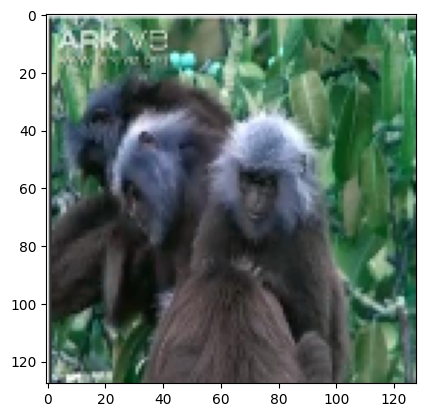

In [ ]:
plt.imshow(images[5]);

# Exploratory Data Analysis

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

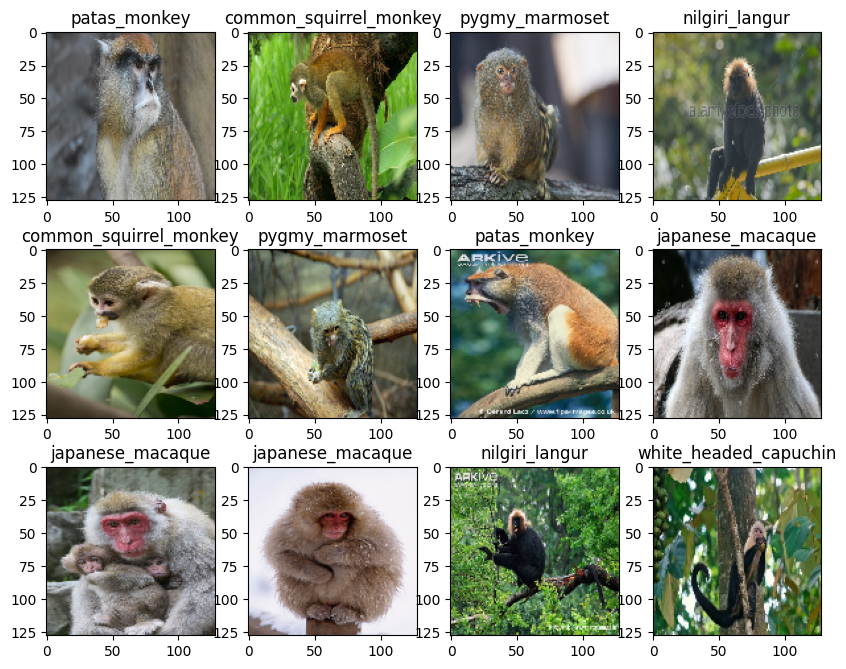

In [ ]:
plot_images(images,labels)

## Checking for data imbalance

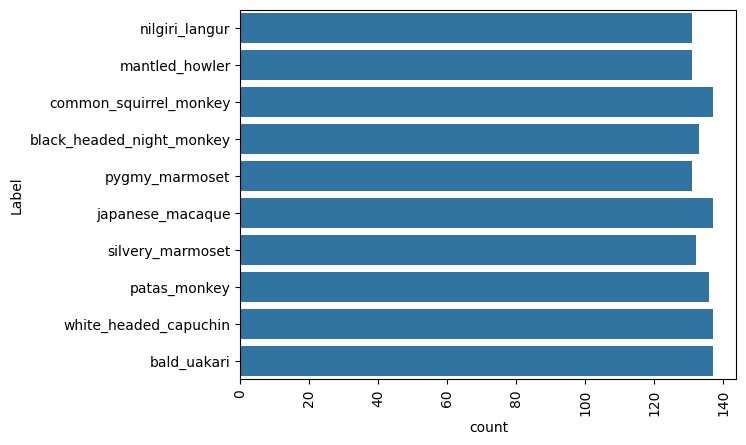

In [ ]:
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical');

- As you can see from the above plot, the dataset is quite balanced.
- There are about 135 images in each category

# Data Preprocessing

## Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append(cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

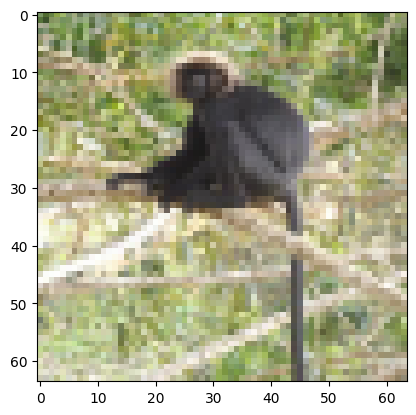

In [ ]:
plt.imshow(images_decreased[3]);

## Visualizing images using Gaussian Blur

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
    images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))

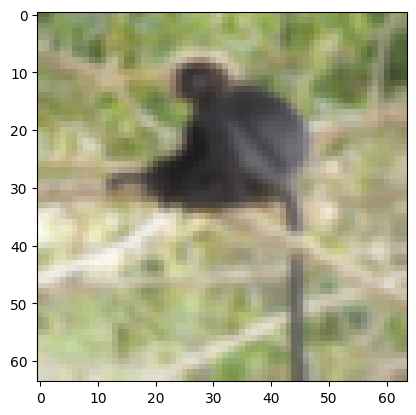

In [ ]:
plt.imshow(images_gb[3]);

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## Splitting the dataset



- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the `train_test_split()` function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_decreased),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(1073, 64, 64, 3) (1073, 1)
(134, 64, 64, 3) (134, 1)
(135, 64, 64, 3) (135, 1)


## Encoding the target labels

- Convert labels from names to one hot vectors


In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
y_train_encoded[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Utility Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [ ]:
def plot_confusion_matrix(model,predictors,target):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

# Model Building

## Model 1 (VGG-16 (Base))

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer (output).


In [ ]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model_1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_1.add(Flatten())

# Adding a dense output layer
model_1.add(Dense(10, activation='softmax'))

In [ ]:
opt=Adam()
# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 14735178 (56.21 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator()

In [ ]:
# Epochs
epochs = 20
# Batch size
batch_size = 128

history_vgg16 = model_1.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
8/8 [==============================] - 36s 5s/step - loss: 2.4137 - accuracy: 0.1196 - val_loss: 2.2229 - val_accuracy: 0.2090
Epoch 2/20
8/8 [==============================] - 27s 3s/step - loss: 2.0975 - accuracy: 0.2561 - val_loss: 1.9672 - val_accuracy: 0.3060
Epoch 3/20
8/8 [==============================] - 29s 4s/step - loss: 1.8560 - accuracy: 0.3841 - val_loss: 1.8260 - val_accuracy: 0.3731
Epoch 4/20
8/8 [==============================] - 28s 4s/step - loss: 1.6704 - accuracy: 0.4635 - val_loss: 1.6977 - val_accuracy: 0.4254
Epoch 5/20
8/8 [==============================] - 28s 4s/step - loss: 1.5566 - accuracy: 0.5185 - val_loss: 1.6125 - val_accuracy: 0.4701
Epoch 6/20
8/8 [==============================] - 26s 3s/step - loss: 1.4649 - accuracy: 0.5503 - val_loss: 1.5593 - val_accuracy: 0.4701
Epoch 7/20
8/8 [==============================] - 28s 3s/step - loss: 1.3782 - accuracy: 0.5757 - val_loss: 1.5065 - val_accuracy: 0.5149
Epoch 8/20
8/8 [==================

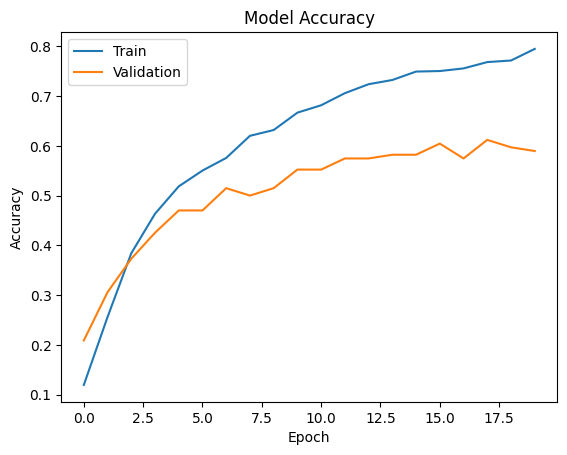

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_1_train_perf)

34/34 [==============================] - 25s 743ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.795899  0.795899   0.799705  0.794801


34/34 [==============================] - 25s 718ms/step


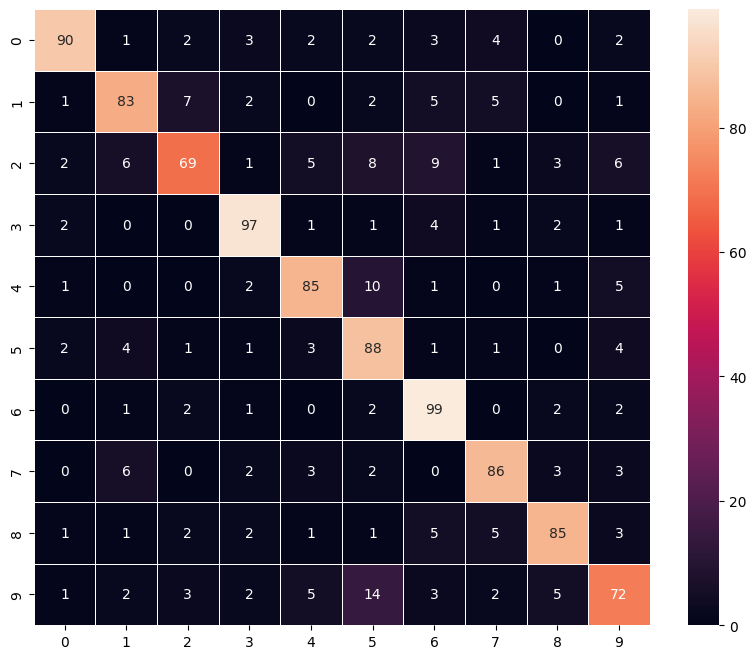

In [ ]:
plot_confusion_matrix(model_1,X_train_normalized,y_train_encoded)

In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

5/5 [==============================] - 4s 842ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.589552  0.589552   0.609854  0.581293


5/5 [==============================] - 3s 526ms/step


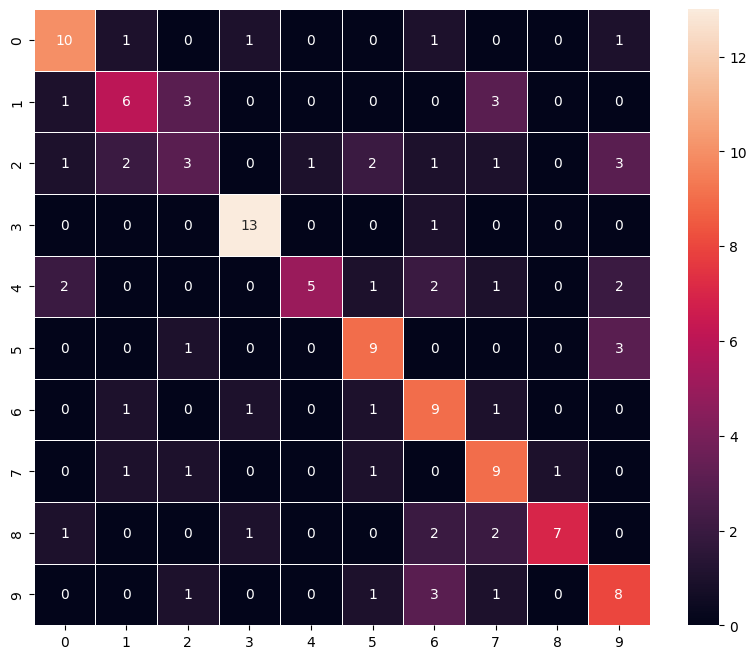

In [ ]:
plot_confusion_matrix(model_1,X_val_normalized,y_val_encoded)

- The model has achieved approximately 80% accuracy on the training set and 59% accuracy on the validation set.

#### Visualizing the predictions

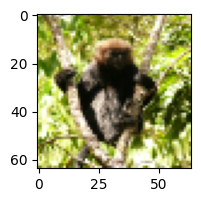

1/1 [==============================] - 0s 110ms/step
Predicted Label ['nilgiri_langur']
True Label nilgiri_langur


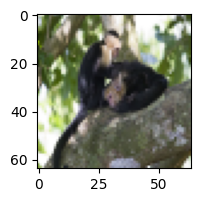

1/1 [==============================] - 0s 87ms/step
Predicted Label ['white_headed_capuchin']
True Label white_headed_capuchin


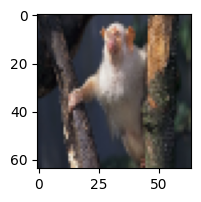

1/1 [==============================] - 0s 90ms/step
Predicted Label ['pygmy_marmoset']
True Label silvery_marmoset


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Model 2 (VGG-16 (Base + FFNN))

- We will directly use the convolutional and pooling layers (VGG-16) and freeze their weights i.e. no training will be done on them.
- For classification, we will add a Flatten layer and a Feed Forward Neural Network.


In [ ]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

#Adding the Feed Forward neural network
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(rate=0.4))
model_2.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_2.add(Dense(10, activation='softmax'))

In [ ]:
opt = Adam()

In [ ]:
# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                8224      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 15247786 (58.17 MB)
Trainable params: 53

In [ ]:
history_vgg16 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
8/8 [==============================] - 41s 5s/step - loss: 2.3845 - accuracy: 0.1228 - val_loss: 2.2357 - val_accuracy: 0.1866
Epoch 2/20
8/8 [==============================] - 28s 3s/step - loss: 2.1811 - accuracy: 0.1937 - val_loss: 2.0640 - val_accuracy: 0.3209
Epoch 3/20
8/8 [==============================] - 28s 4s/step - loss: 2.0060 - accuracy: 0.2878 - val_loss: 1.8877 - val_accuracy: 0.3209
Epoch 4/20
8/8 [==============================] - 26s 3s/step - loss: 1.8862 - accuracy: 0.3418 - val_loss: 1.7561 - val_accuracy: 0.4328
Epoch 5/20
8/8 [==============================] - 28s 4s/step - loss: 1.7323 - accuracy: 0.4032 - val_loss: 1.6568 - val_accuracy: 0.4403
Epoch 6/20
8/8 [==============================] - 26s 3s/step - loss: 1.5696 - accuracy: 0.4889 - val_loss: 1.5585 - val_accuracy: 0.4627
Epoch 7/20
8/8 [==============================] - 27s 3s/step - loss: 1.4733 - accuracy: 0.5175 - val_loss: 1.4778 - val_accuracy: 0.5000
Epoch 8/20
8/8 [==================

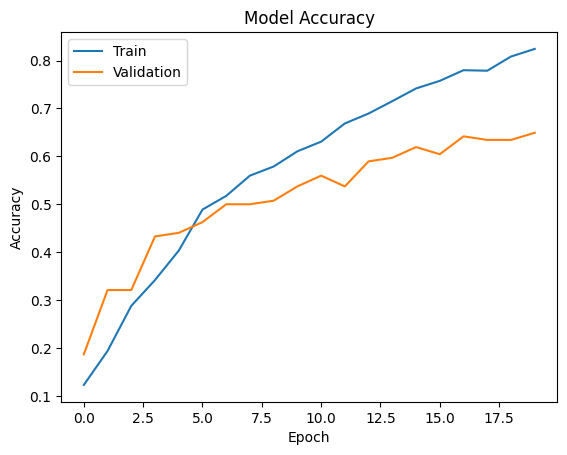

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_2_train_perf)

34/34 [==============================] - 25s 744ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.917055  0.917055   0.919819  0.917703


34/34 [==============================] - 25s 735ms/step


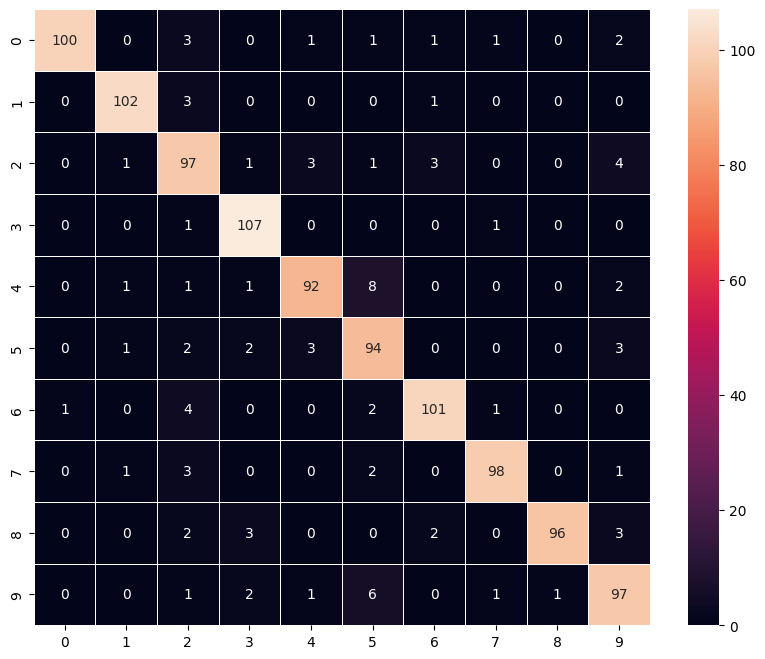

In [ ]:
plot_confusion_matrix(model_2,X_train_normalized,y_train_encoded)

In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_2_valid_perf)

5/5 [==============================] - 6s 1s/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.649254  0.649254   0.655338  0.640152


5/5 [==============================] - 3s 545ms/step


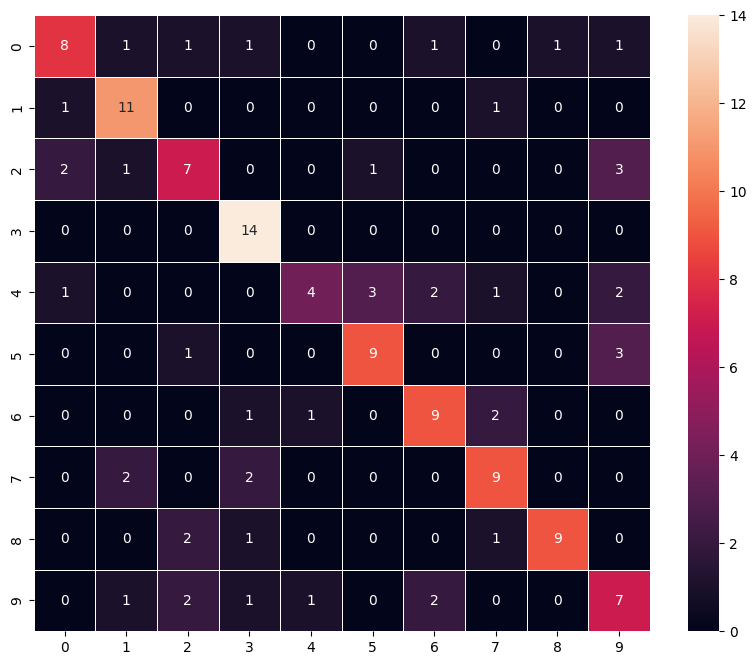

In [ ]:
plot_confusion_matrix(model_2,X_val_normalized,y_val_encoded)

- The model has achieved approximately 92% accuracy on the training set and 65% accuracy on the validation set.

#### Visualizing the prediction:

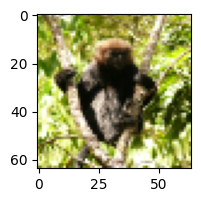

1/1 [==============================] - 0s 52ms/step
Predicted Label ['nilgiri_langur']
True Label nilgiri_langur


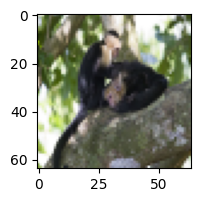

1/1 [==============================] - 0s 51ms/step
Predicted Label ['white_headed_capuchin']
True Label white_headed_capuchin


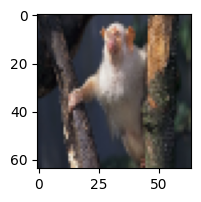

1/1 [==============================] - 0s 53ms/step
Predicted Label ['pygmy_marmoset']
True Label silvery_marmoset


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Model 3 (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(10, activation='softmax'))

In [ ]:
opt=Adam()
# Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                8224      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 15247786 (58.17 MB)
Trainable params: 53

In [ ]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.3,
                              zoom_range=0.4
                              )

In [ ]:
history_vgg16 = model_3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
8/8 [==============================] - 44s 5s/step - loss: 2.4149 - accuracy: 0.1113 - val_loss: 2.2858 - val_accuracy: 0.0821
Epoch 2/20
8/8 [==============================] - 32s 4s/step - loss: 2.2608 - accuracy: 0.1582 - val_loss: 2.2072 - val_accuracy: 0.2090
Epoch 3/20
8/8 [==============================] - 28s 3s/step - loss: 2.1897 - accuracy: 0.1958 - val_loss: 2.0358 - val_accuracy: 0.2910
Epoch 4/20
8/8 [==============================] - 36s 5s/step - loss: 2.1425 - accuracy: 0.2265 - val_loss: 1.9367 - val_accuracy: 0.2910
Epoch 5/20
8/8 [==============================] - 31s 4s/step - loss: 2.0329 - accuracy: 0.2561 - val_loss: 1.8648 - val_accuracy: 0.3284
Epoch 6/20
8/8 [==============================] - 27s 3s/step - loss: 2.0153 - accuracy: 0.2847 - val_loss: 1.7860 - val_accuracy: 0.3881
Epoch 7/20
8/8 [==============================] - 32s 4s/step - loss: 1.9430 - accuracy: 0.3086 - val_loss: 1.7406 - val_accuracy: 0.3731
Epoch 8/20
8/8 [==================

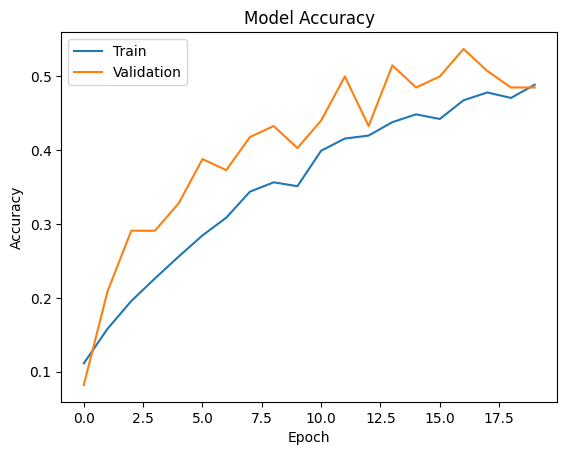

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

34/34 [==============================] - 26s 748ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.626281  0.626281    0.64675  0.610039


34/34 [==============================] - 25s 739ms/step


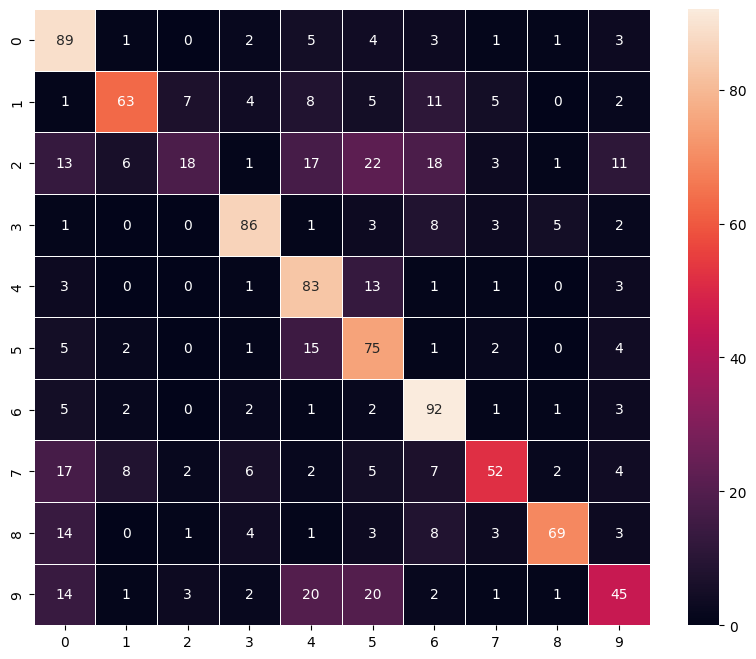

In [ ]:
plot_confusion_matrix(model_3,X_train_normalized,y_train_encoded)

In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

5/5 [==============================] - 3s 543ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.485075  0.485075    0.44894  0.456116


5/5 [==============================] - 3s 565ms/step


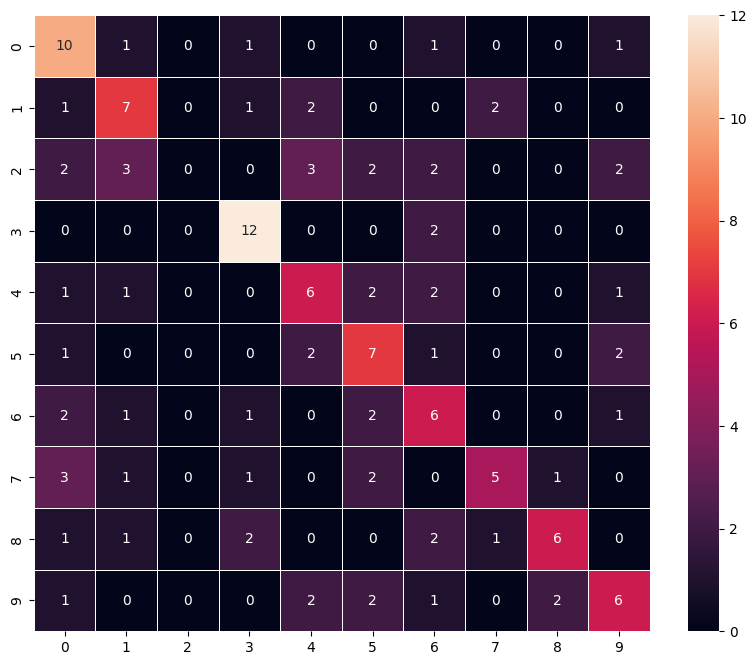

In [ ]:
plot_confusion_matrix(model_3,X_val_normalized,y_val_encoded)

- The model has achieved approximately 63% accuracy on the training set and 49% accuracy on the validation set.

#### Visualizing the prediction:

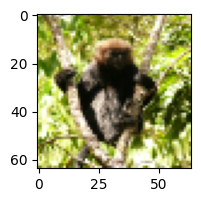

1/1 [==============================] - 0s 57ms/step
Predicted Label ['nilgiri_langur']
True Label nilgiri_langur


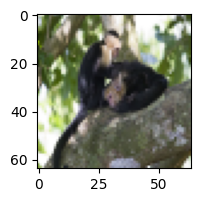

1/1 [==============================] - 0s 53ms/step
Predicted Label ['mantled_howler']
True Label white_headed_capuchin


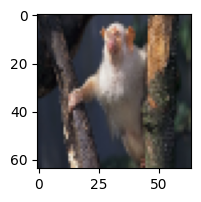

1/1 [==============================] - 0s 53ms/step
Predicted Label ['black_headed_night_monkey']
True Label silvery_marmoset


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_val_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_train_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.795899,0.917055,0.626281
Recall,0.795899,0.917055,0.626281
Precision,0.799705,0.919819,0.646750
F1 Score,0.794801,0.917703,0.610039


In [ ]:
models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.589552,0.649254,0.485075
Recall,0.589552,0.649254,0.485075
Precision,0.609854,0.655338,0.448940
F1 Score,0.581293,0.640152,0.456116


In [ ]:
models_train_comp_df - models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.206347,0.267801,0.141207
Recall,0.206347,0.267801,0.141207
Precision,0.189852,0.264481,0.197810
F1 Score,0.213508,0.277551,0.153923


- VGG-16 (Base+FFNN) has acheived the highest performance in the training set. Also, it has acheived a decent performance of ~ 65% acccuracy in the validation set.

- We'll move ahead with the VGG-16 (Base+FFNN) as our final model.

### Test Performance

In [ ]:
model_2_test_perf = model_performance_classification(model_2, X_test_normalized,y_test_encoded)

5/5 [==============================] - 3s 552ms/step


In [ ]:
model_2_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.644444,0.644444,0.650943,0.637267


5/5 [==============================] - 3s 557ms/step


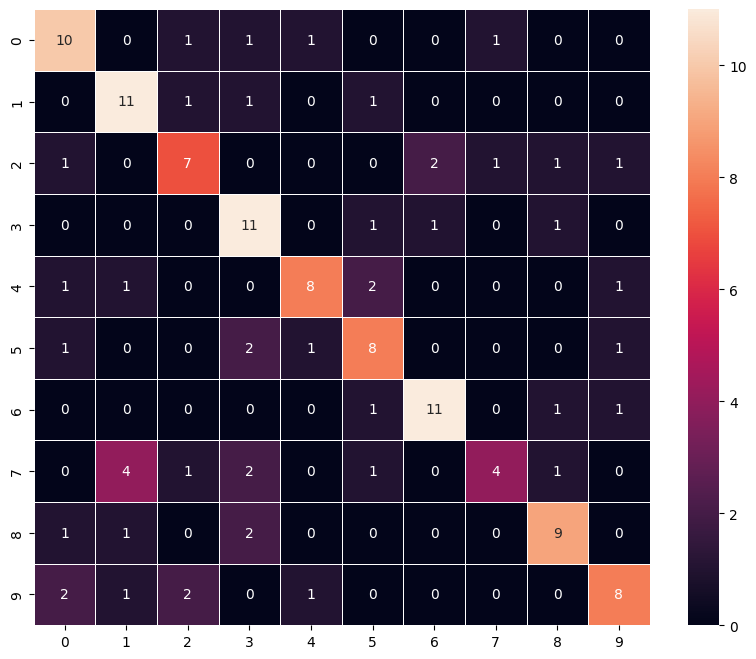

In [ ]:
plot_confusion_matrix(model_2, X_test_normalized,y_test_encoded)

# Business Insights and Recommendations

- Adding a feed-forward neural network on top of the VGG-16 model significantly improved performance. This suggests that while the pre-trained features were beneficial, further refining them with an additional neural network tailored to our dataset enhanced the results.

- However, both the VGG-16-based models are experiencing overfitting. To address this, data augmentation techniques can be applied as a form of regularization.

- Although the performance of Model 3 is not on par with Models 1 and 2, it does not suffer from overfitting.

- These models can be further improved by training with different filter sizes and different number of filters.

- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.

- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.

- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.

<font size=5 color='blue'>Power Ahead!</font>
___